# Работа с последовательностями в Python
В этом ноутбуке мы рассмотрим, как использовать Python для работы с биологическими последовательностями. Мы познакомимся с основными библиотеками и инструментами, которые помогут нам анализировать и манипулировать ДНК, РНК и белковыми последовательностями.

Ноутбук состоит из нескольких разделов, каждый из которых посвящен определенной библиотеке или инструменту.
Мы рассмотрим их основные функции и методы, а также приведем примеры кода для практического применения.

In [4]:
# Установка библиотек
!pip install biopython scikit-bio pysam forgi requests pybiomed repDNA

## Раздел 1: Biopython
Biopython - одна из самых популярных библиотек для работы с биологическими последовательностями в Python. Она предоставляет множество функций для чтения, записи и анализа последовательностей ДНК, РНК и белков.

В этом разделе мы рассмотрим основные методы Biopython, такие как ***SeqIO.write(), SeqIO.parse(), GC(), transcribe(), back_transcribe() и translate()***. Эти методы помогут нам эффективно работать с биологическими данными.

In [3]:
# Импорт необходимых модулей
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils import gc_fraction

In [4]:
# Создание последовательности и запись в файл
seq = Seq("AGTACACTGGT")
record = SeqRecord(seq, id="example", description="Example sequence")
SeqIO.write(record, "example.fasta", "fasta")

1

In [5]:
# Чтение последовательностей из файла
for record in SeqIO.parse("example.fasta", "fasta"):
    print(record.id)
    print(record.seq)

example
AGTACACTGGT


In [6]:
# Расчет GC-содержания
gc_content = gc_fraction(record.seq)
print(f"GC-content: {gc_content}%")

GC-content: 0.45454545454545453%


In [7]:
# Транскрипция ДНК в РНК
rna_seq = record.seq.transcribe()
print(f"RNA sequence: {rna_seq}")

RNA sequence: AGUACACUGGU


In [8]:
# Обратная транскрипция РНК в ДНК
back_to_dna = rna_seq.back_transcribe()
print(f"Back to DNA: {back_to_dna}")

Back to DNA: AGTACACTGGT


In [9]:
# Трансляция ДНК в белок
protein_seq = record.seq.translate()
print(f"Protein sequence: {protein_seq}")

Protein sequence: STL


/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


## Раздел 2: Scikit-bio

Scikit-bio - это мощная библиотека для биоинформатического анализа, которая предоставляет инструменты для работы с последовательностями, филогенетикой и статистикой.

В этом разделе мы изучим, как использовать Scikit-bio для создания объектов последовательностей ДНК, РНК и белков, выполнения локального попарного выравнивания, вычисления расстояний между последовательностями и работы с филогенетическими деревьями.


In [10]:
import skbio
from skbio import DNA, RNA, Protein
from skbio.sequence.distance import hamming

In [11]:
# Создание последовательностей ДНК, РНК и белка
dna_sequence1 = DNA("ACGTACGTGACG")
dna_sequence2 = DNA("TTACGTGGCATG")
rna_sequence = RNA("ACGUACGUGACG")
protein_sequence = Protein("MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAG")

print(dna_sequence1)
print(rna_sequence)
print(protein_sequence)

ACGTACGTGACG
ACGUACGUGACG
MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAG


In [12]:
# Выравнивание последовательностей
alignment = skbio.alignment.local_pairwise_align_ssw(dna_sequence1, dna_sequence2)
print(alignment)

(TabularMSA[DNA]
---------------------
Stats:
    sequence count: 2
    position count: 6
---------------------
TACGTG
TACGTG, 12, [(3, 8), (1, 6)])


/usr/local/lib/python3.10/dist-packages/skbio/util/_warning.py:56: DeprecationWarning: local_pairwise_align_ssw is deprecated as of 0.5.8. It will be removed in favor of more general purpose and performant aligners. Additional details at https://github.com/scikit-bio/scikit-bio/issues/1814.
  warn(


In [13]:
# Расчет расстояния Хэмминга между двумя последовательностями ДНК
dna_seq1 = DNA("ACGTACGTGACG")
dna_seq2 = DNA("ACGTACGTGACC")
hamming_distance = dna_seq1.distance(dna_seq2, metric=hamming)
print(f"Hamming distance: {hamming_distance}")

Hamming distance: 0.08333333333333333


In [14]:
# Филогенетический анализ
tree = skbio.tree.TreeNode.read([ "(A,B,(C,D));" ])
print(tree.ascii_art())

          /-A
         |
---------|--B
         |
         |          /-C
          \--------|
                    \-D


## Раздел 3: Bioconda

Bioconda - это репозиторий пакетов для биоинформатики, который позволяет легко устанавливать и управлять биоинформатическими инструментами с помощью Conda.

В этом разделе мы рассмотрим, как использовать Bioconda для установки таких библиотек, как Biopython, Scikit-bio, Pysam и Forgi. Это позволит нам быстро настроить рабочую среду для анализа биологических данных.


In [ ]:
# Установка Biopython через Bioconda
!conda install biopython

# Установка Scikit-bio через Bioconda
!conda install scikit-bio

# Установка Pysam через Bioconda
!conda install pysam

# Установка Forgi через Bioconda
!conda install forgi

## Раздел 4: Pysam

Pysam - это библиотека для работы с файлами BAM/SAM, которые содержат выровненные данные секвенирования.

В этом разделе мы изучим, как открывать файлы BAM/SAM, читать выравнивания и анализировать данные секвенирования с помощью методов AlignmentFile() и fetch(). Это поможет нам работать с большими объемами данных секвенирования и извлекать из них полезную информацию.


In [16]:
import pysam

In [ ]:
# Открытие файла BAM
bamfile = pysam.AlignmentFile("example.bam", "rb")

# Создание индексного файла
pysam.index("example.bam")

In [18]:
# Чтение выравниваний из проиндексированного BAM файла
for read in bamfile.fetch():
    print(read)

HWI-ST216_0121:5:5:10367:4149#0	0	#13	3003092	0	29M	*	0	0	TTTTTTTTTTTTTTTTTTGTTTCACTCCC	array('B', [37, 30, 36, 38, 36, 38, 38, 38, 37, 36, 38, 38, 38, 38, 38, 38, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])	[('NM', 2), ('NH', 29), ('CC', '='), ('CP', 77453836)]
HWI-ST216_0121:5:23:5662:111777#0	0	#13	3003095	0	29M	*	0	0	TTTTTTTTTTTTTTTTTTTAACACCCTTT	array('B', [38, 38, 38, 38, 37, 36, 38, 36, 38, 37, 38, 37, 38, 37, 36, 37, 37, 37, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])	[('NM', 2), ('NH', 28), ('CC', '='), ('CP', 48389710)]
HWI-ST216_0121:5:45:14636:168630#0	0	#13	3003095	0	29M	*	0	0	TTTTTTTTTTTTTTTTTTTAACACCCTTT	array('B', [39, 39, 39, 39, 38, 39, 39, 39, 39, 36, 39, 39, 39, 39, 39, 39, 38, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])	[('NM', 2), ('NH', 28), ('CC', '='), ('CP', 48389710)]
HWI-ST216_0121:5:48:12224:170948#0	0	#13	3003095	0	29M	*	0	0	TTTTTTTTTTTTTTTTTTTAACTCGCTTT	array('B', [14, 25, 33, 28, 29, 30, 30, 27, 28, 33, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])	[('NM', 2), (

In [19]:
# Получение статистики по файлу BAM
print(bamfile.mapped)  # Количество выровненных ридов
print(bamfile.unmapped)  # Количество невыровненных ридов

9
0


In [20]:
# Получение информации о конкретном риде
read = next(bamfile.fetch())
print(read.query_name)
print(read.reference_start)
print(read.cigarstring)

HWI-ST216_0121:5:5:10367:4149#0
3003091
29M


## Раздел 5: Forgi

Forgi - это библиотека для анализа вторичной структуры РНК.

В этом разделе мы рассмотрим, как использовать Forgi для загрузки структур РНК из файлов CT (Connectivity Table) и анализа их вторичной структуры. Это позволит нам визуализировать и исследовать структуры РНК на молекулярном уровне.



In [25]:
!pip install viennarna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.0 MB/s eta 0:00:00


In [21]:
import forgi.visual.mplotlib as fvm
import forgi
import matplotlib.pyplot as plt

In [22]:
# Загрузка структуры RNA из файла PDB
rna_structure = forgi.load_rna("example.pdb")

In [23]:
# Проверка типа возвращаемого значения
if isinstance(rna_structure, list):
    rna_structure = rna_structure[0]  # Используем первую структуру из списка

IndexError: string index out of range

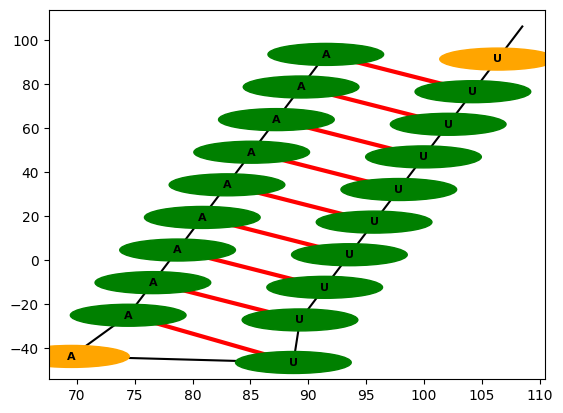

In [26]:
# Визуализация структуры RNA
fig, ax = plt.subplots()
fvm.plot_rna(rna_structure, text_kwargs={"fontsize": 8}, ax=ax)
plt.show()

In [27]:
# Получение информации о структуре RNA в формате dot-bracket
dotbracket_string = rna_structure.to_dotbracket_string()
print("Dot-bracket string:")
print(dotbracket_string)

Dot-bracket string:
(((((((((.&))))))))).


In [28]:
# Получение информации о структуре RNA в элементном формате
element_string = rna_structure.to_element_string()
print("Element string:")
print(element_string)

Element string:
ssssssssstssssssssst


## Раздел 6: Requests + NCBI

Requests - это библиотека Python для выполнения HTTP-запросов.

В этом разделе мы изучим, как использовать Requests для взаимодействия с API NCBI и получения биологических данных из внешних источников. Мы рассмотрим пример запроса к API NCBI для получения информации по ключевому слову и научимся обрабатывать полученные данные.



In [29]:
import requests
from xml.etree import ElementTree

In [30]:
# Шаг 1: Поиск последовательностей в GenBank по ключевому слову
query = "Homo sapiens COX1"
max_results = 1

search_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
search_params = {
    "db": "nucleotide",
    "term": query,
    "retmax": max_results,
    "retmode": "xml"
}

search_response = requests.get(search_url, params=search_params)
search_response.raise_for_status()

In [31]:
# Парсинг XML-ответа для извлечения ID
search_tree = ElementTree.fromstring(search_response.content)
id_list = [id_elem.text for id_elem in search_tree.findall(".//Id")]

if not id_list:
    print("No sequences found.")
else:
    sequence_id = id_list[0]
    print(f"Found sequence ID: {sequence_id}")

Found sequence ID: 2754160704


In [32]:
# Шаг 2: Запрос данных по полученному ID в формате GenBank
fetch_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi"
fetch_params = {
        "db": "nucleotide",
        "id": sequence_id,
        "rettype": "gb",
        "retmode": "text"
    }

fetch_response = requests.get(fetch_url, params=fetch_params)
fetch_response.raise_for_status()

# Вывод полученной информации
print(fetch_response.text)

LOCUS       PP989442                 398 bp    DNA     linear   INV 11-JUL-2024
DEFINITION  Thelazia callipaeda isolate TcHmn cytochrome c oxidase subunit I
            (COX1) gene, partial cds; mitochondrial.
ACCESSION   PP989442
VERSION     PP989442.1
KEYWORDS    .
SOURCE      mitochondrion Thelazia callipaeda (thelaziosis nematode)
  ORGANISM  Thelazia callipaeda
            Eukaryota; Metazoa; Ecdysozoa; Nematoda; Chromadorea; Rhabditida;
            Spirurina; Spiruromorpha; Thelazioidea; Thelaziidae; Thelazia.
REFERENCE   1  (bases 1 to 398)
  AUTHORS   Kuru,N., Celik,F., Cayhan,G., Bagbudar,S., Korkmaz,M. and Simsek,S.
  TITLE     First occurrence and molecular description of human Thelazia
            callipaeda infection eastern Tuerkiye
  JOURNAL   Unpublished
REFERENCE   2  (bases 1 to 398)
  AUTHORS   Kuru,N., Celik,F., Cayhan,G., Bagbudar,S., Korkmaz,M. and Simsek,S.
  TITLE     Direct Submission
  JOURNAL   Submitted (06-JUL-2024) Department of Parasitology, Faculty of
  

In [33]:
from io import StringIO
# Шаг 3: Обработка данных и извлечение последовательности генома
genbank_data = fetch_response.text
genbank_io = StringIO(genbank_data)
record = SeqIO.read(genbank_io, "genbank") # Используется функция SeqIO.read из библиотеки BioPython

# Извлечение и вывод последовательности генома
genome_sequence = record.seq
print("Genome Sequence:")
print(genome_sequence)

Genome Sequence:
TTTTGCCGGCTTTTGGTATTATCAGGGAGGCAGTTTTGTTTTTGACTGATAAGGAACGTTTATTTGGTCAGGTTAGTATGACTTTTGCTTCGATTTGAATTGCTATTCTGGGAACTTCTGTTTGAGGTCACCATATATATACTGCAGGTTTGGATATTGATACTCGTACTTATTTTAGGGCTGCTACAATGATTATTGCTGTCCCCAGAGCGGTAAAGGTTTTTAATTGGTTGTGTACTTTTTTTGGTTCTCATCAAAAAATTCAGCCTTTGTTGTGTTGAACTTACAGTTTTATTATTTTATTTACTTTAGGTGGTTTAAGCGGTATTGTTTTGAGAGCAGCTAGATTAGATATTGTGTTACATGATACTTATTATGTTGTGGCTCATTTTCATTAT


## Раздел 7: PyBioMed + repDNA

PyBioMed и repDNA - это библиотеки для вычисления дескрипторов биологических последовательностей.

В этом разделе мы изучим, как использовать PyBioMed для анализа белковых последовательностей и вычисления различных дескрипторов с помощью метода ***GetProtein()***. Мы также рассмотрим библиотеку repDNA для вычисления псевдодинуклеотидных композиционных дескрипторов (PseDNC) для ДНК-последовательностей с помощью метода ***PseDNC()***. Эти инструменты помогут нам проводить детальный анализ биологических последовательностей и их характеристик.

In [1]:
from PyBioMed.Pyprotein import PyProtein
from repDNA.psenac import PseDNC
from repDNA.nac import Kmer
from repDNA.ac import TAC

In [35]:
# Расчет дескрипторов для белковой последовательности с использованием PyBioMed
protein_sequence = "AGTACACTGGT"
protein_descriptor = PyProtein(protein_sequence)
print(protein_descriptor.GetAAComp())  # Аминокислотный состав

{'A': 27.273, 'R': 0.0, 'N': 0.0, 'D': 0.0, 'C': 18.182, 'E': 0.0, 'Q': 0.0, 'G': 27.273, 'H': 0.0, 'I': 0.0, 'L': 0.0, 'K': 0.0, 'M': 0.0, 'F': 0.0, 'P': 0.0, 'S': 0.0, 'T': 27.273, 'W': 0.0, 'Y': 0.0, 'V': 0.0}


In [2]:
# Расчет дескрипторов для ДНК-последовательности с использованием repDNA
dna_sequence = ["AGTACACTGGT"]
psednc = PseDNC(lamada=2, w=0.5)
descriptor = psednc.make_psednc_vec(dna_sequence)
print(descriptor)

[[0.0, 0.059, 0.029, 0.0, 0.029, 0.0, 0.0, 0.029, 0.0, 0.0, 0.029, 0.059, 0.029, 0.0, 0.029, 0.0, 0.4449, 0.2601]]


In [3]:
# Вычисление дескрипторов нуклеотидного состава (например, K-mer)
kmer = Kmer(k=2)
kmer_descriptor = kmer.make_kmer_vec(dna_sequence)
print("K-mer Descriptor:", kmer_descriptor)

K-mer Descriptor: [[0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0]]


In [4]:
# Вычисление дескрипторов автокорреляции (например, TAC)
tac = TAC(lag=2)
tac_descriptor = tac.make_tac_vec(dna_sequence)
print("TAC Descriptor:", tac_descriptor)

TAC Descriptor: [[]]


In [6]:
!git clone https://github.com/liufule12/repDNA.git

Cloning into 'repDNA'...
remote: Enumerating objects: 868, done.
remote: Total 868 (delta 0), reused 0 (delta 0), pack-reused 868
Receiving objects: 100% (868/868), 13.48 MiB | 14.04 MiB/s, done.
Resolving deltas: 100% (486/486), done.


In [5]:
%cd repDNA/repDNA

!ls
# Исправления для модуля psenac
!sed -i 's/from psenacutil/from .psenacutil/' psenac.py
!sed -i 's/from util/from .util/' psenac.py
!sed -i 's/from util/from .util/' nacutil.py
!sed -i 's/from util/from .util/' psenacutil.py
!sed -i 's/from nacutil/from .nacutil/' psenacutil.py

# Исправления для модуля nac
!sed -i 's/from nacutil/from .nacutil/' nac.py
!sed -i 's/from util/from .util/' nac.py

# Исправления для модуля ac
!sed -i 's/from util/from .util/' ac.py
!sed -i 's/from acutil/from .acutil/' ac.py
!sed -i 's/from psenacutil/from .psenacutil/' util.py

%cd ..

!pip install .

/content/repDNA/repDNA
ac.py	   data  example      nac.py	  psenac.py	 test
acutil.py  doc	 __init__.py  nacutil.py  psenacutil.py  util.py
/content/repDNA
Processing /content/repDNA
  Preparing metadata (setup.py) ... done
  Created wheel for repDNA: filename=repDNA-1.1.4-py3-none-any.whl size=1542086 sha256=919c879f4d32f7d566dcc7015bc8d8cf9129f216cefec998b0af497f0b104dd8
  Stored in directory: /tmp/pip-ephem-wheel-cache-ekgb4qn3/wheels/f9/79/fa/1cfa8ecde2b83f4b56fcd10773b6b3d280d1a6d409b9090b13
Successfully built repDNA
  Attempting uninstall: repDNA
    Found existing installation: repDNA 1.1.4
    Uninstalling repDNA-1.1.4:
      Successfully uninstalled repDNA-1.1.4
